In [2]:
from scipy import optimize
import scipy as sp
import thermoengine as thermo
import matplotlib.pyplot as plt
from scipy.optimize import leastsq
import pickle
import dill
import numpy as np
import os
import matplotlib.colors as mcolors
import matplotlib.cm as cm
import numdifftools as nd

%run 'critical_point_finder_code.ipynb'
%run "excess_thermo_calc_functions.ipynb"
%run "core.ipynb"
%load_ext snakeviz
%run "load_coder_fitted_models.ipynb"

/Users/jennaadams/Documents/projects/ThermoEngine/Notebooks/Codegen/working
/Users/jennaadams/Documents/projects/ThermoEngine/Notebooks/Codegen
Solution phase code generated by the coder module does not yet provide information on solution species. Species are proxied by components.
Solution phase code generated by the coder module does not yet provide information on species properties. Species are proxied by components.
/Users/jennaadams/Documents/projects/ThermoEngine/Notebooks/Codegen/working
/Users/jennaadams/Documents/projects/ThermoEngine/Notebooks/Codegen
Solution phase code generated by the coder module does not yet provide information on solution species. Species are proxied by components.
Solution phase code generated by the coder module does not yet provide information on species properties. Species are proxied by components.
/Users/jennaadams/Documents/projects/ThermoEngine/Notebooks/Codegen/working
/Users/jennaadams/Documents/projects/ThermoEngine/Notebooks/Codegen
Solution

In [3]:
os.chdir('/Users/jennaadams/Documents/projects/thermoengine_mirrored/https:/gitlab.com/aswolf/ThermoEngineMirror/Notebooks/Calibration/Garnet_calibration')

In [4]:
np.array(ganguly96_coder.param_names)

array(['T_r', 'P_r', 'Wh12', 'Ws12', 'Wv12', 'dWh12', 'dWs12', 'dWv12',
       'Wh13', 'Ws13', 'Wv13', 'dWh13', 'dWs13', 'dWv13', 'Wh23', 'Ws23',
       'Wv23', 'dWh23', 'dWs23', 'dWv23', 'Wh123', 'Ws123', 'Wv123'],
      dtype='<U5')

In [5]:
muko97_coder.get_param_values()[2:]

array([-2.93500e+02, -5.00000e-01,  8.75000e-02, -1.78195e+04,
       -1.50100e+01, -4.75000e-02, -9.50500e+02, -4.84500e+00,
        8.00000e-03,  2.32155e+04,  1.72450e+01,  4.20000e-02,
        3.97440e+04,  1.16550e+01,  1.04000e-01, -2.54380e+04,
       -9.16500e+00,  3.60000e-02,  0.00000e+00,  0.00000e+00,
        0.00000e+00])

In [6]:
data_dir='Data/'
vingograd_2006_1bar_data=pd.read_excel(data_dir+'vinograd_digitzed_data_fig16b_finer.xlsx')
vingograd_2006_3gpa_data=pd.read_excel(data_dir+'vinograd_digitzed_data_fig16c_finer.xlsx')
haselton_newton_1bar_data=pd.read_excel(data_dir+'hasleton_newton_1bar.xlsx')
haselton_newton_2gpa_data=pd.read_excel(data_dir+'hasleton_newton_2gpa.xlsx')
haselton_newton_4gpa_data=pd.read_excel(data_dir+'hasleton_newton_4gpa.xlsx')
dachs_geiger_1bar_data=pd.read_excel(data_dir+'Dachs_geiger_data_1bar.xlsx')
dachs_geiger_4gpa_data=pd.read_excel(data_dir+'Dachs_geiger_data_4gpa.xlsx')
du_8gpa_data=pd.read_excel(data_dir+'du_8gpa_data.xlsx')
du_2gpa_data=pd.read_excel(data_dir+'du_2gpa.xlsx')
holland_2018_1bar_data=pd.read_excel(data_dir+'solvus_1bar_Holland2018.xlsx')
holland_2018_3gpa_data=pd.read_excel(data_dir+'solvus_3gpa_Holland2018.xlsx')

In [7]:
dachs_geiger_1bar_data['X']=1-(dachs_geiger_1bar_data['X']/100)
dachs_geiger_4gpa_data['X']=1-(dachs_geiger_4gpa_data['X']/100)
du_8gpa_data['X']=1-(du_8gpa_data['X']/100)
du_2gpa_data['X']=1-(du_2gpa_data['X']/100)

In [8]:
os.chdir('/Users/jennaadams/Documents/projects/ThermoEngine/Notebooks/Calibration/Garnet_calibration')

In [9]:
 #Load data (deserialize)
with open('fit_testing_data_new_fits_june30.pickle', 'rb') as handle:
    fit_testing_data_new_fits_june30 = pickle.load(handle)

In [10]:
 #Load data (deserialize)
with open('monte_carlo_dict.pickle', 'rb') as handle:
    monte_carlo_dict = pickle.load(handle)

In [11]:
covx=monte_carlo_dict['iteration3']['covariance_matrix']

In [12]:
#np.savetxt('covx.csv', covx, delimiter=',')

In [13]:
np.sqrt(np.diag(covx))*2

array([7.20303029e+00, 3.78922335e-02, 1.78513320e-04, 1.99901083e+00,
       1.27191533e-01, 1.06853464e-02, 1.98230888e+01, 2.32729239e-02,
       9.99996792e-06, 1.99997641e+00, 2.17842942e-01, 1.59050101e-02,
       1.98092908e+01, 2.90810979e-02, 9.99847011e-05, 1.99999159e+00,
       2.92986297e-01, 2.25229477e-02])

In [14]:
#best_fit=fit_testing_data_new_fits_june30['test2']['all parameters except ternary params']

In [15]:
best_fit=monte_carlo_dict['iteration3']

In [16]:
np.array(fitted_coder_pmelts.param_names[2:-3])

array(['Wh12', 'Ws12', 'Wv12', 'dWh12', 'dWs12', 'dWv12', 'Wh13', 'Ws13',
       'Wv13', 'dWh13', 'dWs13', 'dWv13', 'Wh23', 'Ws23', 'Wv23', 'dWh23',
       'dWs23', 'dWv23'], dtype='<U5')

In [17]:
best_fit['best_fit_sol_vals']

array([ 5.19104094e+04,  3.21504843e+01,  1.20993363e-01,  9.28034371e+03,
        3.67696598e+01, -4.54660626e-01,  1.00111240e+04, -8.71817781e+00,
        3.27875343e-02,  1.22156445e+03,  1.74981805e+00, -6.89189413e-01,
        5.98742483e+04,  1.82413452e+01,  4.88655990e-02, -2.32001967e+03,
        6.21265452e+00, -4.17161548e-01])

In [18]:
cov_matrix_scaled=best_fit['covariance_matrix']*2.227083722547888

In [19]:
#cov_matrix_scaled=best_fit['covariance_matrix']*1.693274152130998*(1000**2)
#cov_matrix_scaled=best_fit['covariance_matrix']*1.693274152130998

In [20]:
#best_fit_sol_vals=best_fit['solution_parameters']
best_fit_sol_vals=best_fit['best_fit_sol_vals']

In [21]:
best_fit_sol_vals

array([ 5.19104094e+04,  3.21504843e+01,  1.20993363e-01,  9.28034371e+03,
        3.67696598e+01, -4.54660626e-01,  1.00111240e+04, -8.71817781e+00,
        3.27875343e-02,  1.22156445e+03,  1.74981805e+00, -6.89189413e-01,
        5.98742483e+04,  1.82413452e+01,  4.88655990e-02, -2.32001967e+03,
        6.21265452e+00, -4.17161548e-01])

In [22]:
sat_affs_test=np.array([16454.15750894, 12408.69261663, 13954.86698486, 15053.07925696,
         15179.8484748 ,  8499.91374262, 13839.90749468, 11955.99844839,
         10948.6755937 , 15986.42422123, 27142.70675874, 23341.76474171,
         23080.57188505, 15627.88891034, 43098.4397059 , 24868.58626153,
          9496.50132577, 24946.32081633, 23146.09744478, -2926.92132529,
          6490.57531897, -5031.51287504,  8892.71234869,  8050.83323554,
         13844.5493342 , 13171.56934159, 13503.4001028 , 12619.00251127,
         10649.49589969, 12387.55973549,  5465.22321555,  8435.70884678,
          7085.57907175,  7470.51504017,  9035.51412709,  9406.38354212,
           911.87456152, 20549.27818139, 27988.54764947, 20354.16102146,
         10398.2285694 , 12144.81395688, 12267.74679623, 11879.98204025,
         11721.58631339, 12704.6578777 , 12457.23344564, 11919.96004544,
         14222.76529847, 11294.09853488, 17503.19712652, 23658.58623422,
         27440.59017471, 25978.96451778])

In [23]:
binary_endmems=[0,2,3]
min_val=np.sqrt(np.finfo(float).eps)
comp_space=np.linspace(min_val,1-min_val,50)

comp_matrix23=get_binary_comp_matrix(min_val, comp_space, binary_endmems, inverse=True)

In [24]:
len(best_fit_sol_vals)

In [25]:
param_cov=cov_matrix_scaled

In [26]:
len(param_cov)

In [27]:
errors_on_sol_params=np.sqrt(np.diag(param_cov))

In [28]:
#param_names_arr[2:-3]

In [29]:
errors_on_sol_params/1000


array([5.37469120e-03, 2.82740799e-05, 1.33201435e-07, 1.49160360e-03,
       9.49066136e-05, 7.97309399e-06, 1.47914109e-02, 1.73655773e-05,
       7.46168452e-09, 1.49232409e-03, 1.62548052e-04, 1.18678548e-05,
       1.47811153e-02, 2.16994674e-05, 7.46056689e-08, 1.49233542e-03,
       2.18617833e-04, 1.68059669e-05])

In [30]:
len(errors_on_sol_params)

In [31]:
Ndraw=100
#param_means=best_fit_sol_vals[2:-3]
param_means=best_fit_sol_vals
param_cov=param_cov
posterior_draw=sp.random.multivariate_normal(
           param_means, param_cov, Ndraw)

/Users/jennaadams/anaconda3/envs/py36workshop/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  


In [32]:
posterior_draw[37]

array([ 5.19045707e+04,  3.21756461e+01,  1.20948150e-01,  9.28105945e+03,
        3.66323489e+01, -4.64061436e-01,  9.98612003e+03, -8.74724519e+00,
        3.27908647e-02,  1.22403803e+03,  1.82819025e+00, -6.81370155e-01,
        5.98605499e+04,  1.82326934e+01,  4.87976338e-02, -2.31969423e+03,
        6.33069669e+00, -4.08280452e-01])

In [33]:
(posterior_draw[37]-param_means)/np.sqrt(np.diag(param_cov))

array([-1.08632471,  0.88992603, -0.33943227,  0.47984838, -1.44679998,
       -1.17906671, -1.69043711, -1.6738506 ,  0.44633661,  1.65753253,
        0.48214787,  0.65886024, -0.92675529, -0.39871361, -0.91099239,
        0.2180701 ,  0.53994761,  0.52844898])

In [34]:
binary_endmems=[0,2,3]
min_val=np.sqrt(np.finfo(float).eps)
comp_space=np.linspace(min_val,1-min_val,50)

comp_matrix23=get_binary_comp_matrix(min_val, comp_space, binary_endmems, inverse=True)
comp_matrix=np.array(comp_matrix23)

In [35]:
def calc_solvus_surface(T_range, P, model=None):
    
    comp_left=[]
    comp_right=[]
    for iT in T_range:
        
        try:
            iconvex_hull_data, ihull_index_left, ihull_index_right, igibbs_energy=find_solvus(iT, P, model=model)
    
            ihull_data_left=iconvex_hull_data[ihull_index_left][0]
            ihull_data_right=iconvex_hull_data[ihull_index_right][0]
    
            comp_left.append(ihull_data_left)
            comp_right.append(ihull_data_right)
        
        except:
            #print('Could not find solvus')
            continue
    
    return comp_left, comp_right

In [36]:
grt_model_fit=modelDB_fitted.phases['Grt']

In [37]:
grt_model_fit.get_param_values()

array([298.15,   1.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,
         0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,
         0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ])

In [38]:
#all_inds=(np.linspace(2, 22, 21)).astype(int)
all_inds=np.array([ 2,  3,  4, 5, 6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19])

In [39]:
all_inds

array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19])

In [40]:
len(all_inds)

In [41]:
T_range=np.arange(473, 3000)
P=1
solvus_surface_list=[]
temp_list=[]
for ipdraw in posterior_draw:
    grt_model_fit.set_param_values(ipdraw, all_inds)
    
    icomp_left, icomp_right=calc_solvus_surface(T_range, P, model=grt_model_fit)
    
    isolvus_surface=np.append(np.array(icomp_left), np.array(icomp_right)[::-1])

    itemps=np.append(T_range[0:len(icomp_left)], T_range[0:len(icomp_right)][::-1])    
    
    solvus_surface_list.append(isolvus_surface)
    temp_list.append(itemps)
    
    # calc solvus, append values to list, vstack into matrix, np.quantile at 1 sigma bounds, 
    # returns list of T's of 1 sig lower and upper bound, use fill between to show 1 sigma uncertainty
    

In [42]:
T_range=np.arange(473, 3000)
P=30000
solvus_surface_list_3gpa=[]
temp_list_3gpa=[]
for ipdraw in posterior_draw:
    grt_model_fit.set_param_values(ipdraw, all_inds)
    
    icomp_left, icomp_right=calc_solvus_surface(T_range, P, model=grt_model_fit)
    
    isolvus_surface=np.append(np.array(icomp_left), np.array(icomp_right)[::-1])

    itemps=np.append(T_range[0:len(icomp_left)], T_range[0:len(icomp_right)][::-1])    
    
    solvus_surface_list_3gpa.append(isolvus_surface)
    temp_list_3gpa.append(itemps)
    
    # calc solvus, append values to list, vstack into matrix, np.quantile at 1 sigma bounds, 
    # returns list of T's of 1 sig lower and upper bound, use fill between to show 1 sigma uncertainty
    

In [43]:
T_range=np.arange(473, 3000)
P=80000
solvus_surface_list_8gpa=[]
temp_list_8gpa=[]
for ipdraw in posterior_draw:
    grt_model_fit.set_param_values(ipdraw, all_inds)
    
    icomp_left, icomp_right=calc_solvus_surface(T_range, P, model=grt_model_fit)
    
    isolvus_surface=np.append(np.array(icomp_left), np.array(icomp_right)[::-1])

    itemps=np.append(T_range[0:len(icomp_left)], T_range[0:len(icomp_right)][::-1])    
    
    solvus_surface_list_8gpa.append(isolvus_surface)
    temp_list_8gpa.append(itemps)
    

In [44]:
len(posterior_draw)

In [45]:
len(temp_list_8gpa[0])

In [46]:
len(temp_list_3gpa[0])

In [47]:
len(temp_list[0])

In [48]:
solvus_surface_list

[array([0.98, 0.98, 0.98, 0.98, 0.98, 0.98, 0.98, 0.98, 0.98, 0.98, 0.98,
        0.98, 0.98, 0.98, 0.98, 0.98, 0.98, 0.98, 0.98, 0.98, 0.98, 0.98,
        0.98, 0.98, 0.98, 0.98, 0.98, 0.98, 0.98, 0.98, 0.98, 0.98, 0.98,
        0.98, 0.98, 0.98, 0.98, 0.98, 0.98, 0.98, 0.98, 0.98, 0.98, 0.98,
        0.98, 0.98, 0.97, 0.97, 0.97, 0.97, 0.97, 0.97, 0.97, 0.97, 0.97,
        0.97, 0.97, 0.97, 0.97, 0.97, 0.97, 0.97, 0.97, 0.97, 0.97, 0.97,
        0.97, 0.97, 0.97, 0.97, 0.97, 0.97, 0.97, 0.97, 0.97, 0.97, 0.97,
        0.97, 0.97, 0.97, 0.97, 0.97, 0.97, 0.97, 0.97, 0.97, 0.97, 0.97,
        0.97, 0.97, 0.97, 0.97, 0.97, 0.97, 0.97, 0.97, 0.97, 0.97, 0.97,
        0.97, 0.97, 0.97, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96,
        0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96,
        0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96,
        0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96,
        0.95, 0.95, 0.95, 0.95, 0.95, 

In [49]:
np.where(temp_list[0]==temp_list[0].max())

(array([453, 454]),)

In [50]:
solvus_surface_list[0][451]

In [51]:
critical_composition=[]
for itemp, isolvus in zip(temp_list, solvus_surface_list):
    temp_max=np.where(itemp==itemp.max())
    isolvus1=isolvus[temp_max[0]]
    isolvus2=isolvus[temp_max[-1]]
    isolvus_avg=(isolvus1+isolvus2)/2
    
    
    critical_composition.append(isolvus_avg)
critical_composition=np.array(critical_composition)    

In [52]:
critical_composition_3gpa=[]
for itemp, isolvus in zip(temp_list_3gpa, solvus_surface_list_3gpa):
    temp_max=np.where(itemp==itemp.max())
    isolvus1=isolvus[temp_max[0]]
    isolvus2=isolvus[temp_max[-1]]
    isolvus_avg=(isolvus1+isolvus2)/2
    
    
    critical_composition_3gpa.append(isolvus_avg)
critical_composition_3gpa=np.array(critical_composition_3gpa)    

In [53]:
np.mean(critical_composition_3gpa)

In [54]:
critical_composition_8gpa=[]
for itemp, isolvus in zip(temp_list_8gpa, solvus_surface_list_8gpa):
    temp_max=np.where(itemp==itemp.max())
    isolvus1=isolvus[temp_max[0]]
    isolvus2=isolvus[temp_max[-1]]
    isolvus_avg=(isolvus1+isolvus2)/2
    
    
    critical_composition_8gpa.append(isolvus_avg)
critical_composition_8gpa=np.array(critical_composition_8gpa) 

In [55]:
np.mean(critical_composition_8gpa)

In [56]:
max_list_1bar=[]
mean_list_1bar=[]
for ival in temp_list:
    imax=ival.max()
    max_list_1bar.append(imax)
    
    mean_tot_1bar=np.mean(max_list_1bar)
    std_dev_1bar=np.std(max_list_1bar)

In [57]:
std_dev_1bar

In [58]:
mean_tot_1bar-273

In [59]:
max_list_3gpa=[]
mean_list_3gpa=[]
for ival in temp_list_3gpa:
    imax=ival.max()
    max_list_3gpa.append(imax)
    
    mean_tot_3gpa=np.mean(max_list_3gpa)
    std_dev_3gpa=np.std(max_list_3gpa)

In [60]:
mean_tot_3gpa-273

In [61]:
std_dev_3gpa

In [62]:
max_list_8gpa=[]
mean_list_8gpa=[]
for ival in temp_list_8gpa:
    imax=ival.max()
    max_list_8gpa.append(imax)
    
    mean_tot_8gpa=np.mean(max_list_8gpa)
    std_dev_8gpa=np.std(max_list_8gpa)

In [63]:
mean_tot_8gpa-273

In [64]:
std_dev_8gpa*2

In [65]:
#np.where(temp_list[0]==927)

In [66]:
#mean_tot_1bar-273

In [67]:
#std_dev_1bar*2

In [68]:
#mean_tot_3gpa-273

In [69]:
#std_dev_3gpa*2

In [70]:
#mean_tot_8gpa-273

In [71]:
#std_dev_8gpa*2

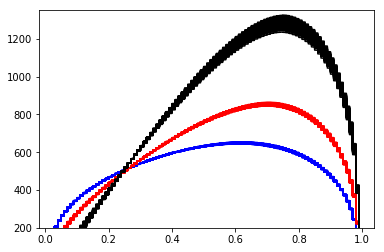

In [72]:
for isolvus, itemp in zip(solvus_surface_list, temp_list):
    plt.plot(isolvus, itemp-273, 'b-')
    
for isolvus, itemp in zip(solvus_surface_list_3gpa, temp_list_3gpa):
    plt.plot(isolvus, itemp-273, 'r-')
    
for isolvus, itemp in zip(solvus_surface_list_8gpa, temp_list_8gpa):
    plt.plot(isolvus, itemp-273, 'k-')
    
    
plt.ylim(200,1350)

In [73]:
max_vals=[]
min_vals=[]
for ivec in temp_list_8gpa:
    imax_val=ivec.max()
    imin_val=ivec.min()
    
    max_vals.append(imax_val)
    min_vals.append(imin_val)

In [74]:
max_vals=np.array(max_vals)

In [75]:
max_vals[58]

1554

In [76]:
max_vals.max()

1598

In [77]:
np.where(max_vals==1568)

(array([86]),)

In [78]:
max_vals.min()

1508

In [79]:
np.where(max_vals==1499)

(array([], dtype=int64),)

In [80]:
new_x_list=[]
new_y_list=[]
for ipt, itemp in zip(solvus_surface_list, temp_list):
    iodd_pts=ipt[1::2]
    iodd_temps=itemp[1::2]
    
    ieven_pts=ipt[0::2]
    ieven_temps=itemp[0::2]
    
    ieven_polyfit=np.polyfit(ieven_pts, ieven_temps, deg=20)
    iodd_polyfit=np.polyfit(iodd_pts, iodd_temps, deg=20)
    iavg_polyfit=(ieven_polyfit+iodd_polyfit)/2

    ipoly = np.poly1d(iavg_polyfit)
    inew_x = np.linspace(ipt[0], ipt[-1])
    inew_y = ipoly(inew_x)
    
    new_x_list.append(inew_x)
    new_y_list.append(inew_y)

/Users/jennaadams/anaconda3/envs/py36workshop/lib/python3.6/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/Users/jennaadams/anaconda3/envs/py36workshop/lib/python3.6/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/Users/jennaadams/anaconda3/envs/py36workshop/lib/python3.6/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/Users/jennaadams/anaconda3/envs/py36workshop/lib/python3.6/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/Users/jennaadams/anaconda3/envs/py36workshop/lib/python3.6/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we

In [81]:
new_x_list_3gpa=[]
new_y_list_3gpa=[]
for ipt, itemp in zip(solvus_surface_list_3gpa, temp_list_3gpa):
    iodd_pts_3gpa=ipt[1::2]
    iodd_temps_3gpa=itemp[1::2]
    
    ieven_pts_3gpa=ipt[0::2]
    ieven_temps_3gpa=itemp[0::2]
    
    ieven_polyfit_3gpa=np.polyfit(ieven_pts_3gpa, ieven_temps_3gpa, deg=12)
    iodd_polyfit_3gpa=np.polyfit(iodd_pts_3gpa, iodd_temps_3gpa, deg=12)
    iavg_polyfit_3gpa=(ieven_polyfit_3gpa+iodd_polyfit_3gpa)/2

    ipoly_3gpa = np.poly1d(iavg_polyfit_3gpa)
    inew_x_3gpa = np.linspace(ipt[0], ipt[-1])
    inew_y_3gpa = ipoly_3gpa(inew_x_3gpa)
    
    new_x_list_3gpa.append(inew_x_3gpa)
    new_y_list_3gpa.append(inew_y_3gpa)

In [82]:
new_x_list_8gpa=[]
new_y_list_8gpa=[]
for ipt, itemp in zip(solvus_surface_list_8gpa, temp_list_8gpa):
    iodd_pts_8gpa=ipt[1::2]
    iodd_temps_8gpa=itemp[1::2]
    
    ieven_pts_8gpa=ipt[0::2]
    ieven_temps_8gpa=itemp[0::2]
    
    ieven_polyfit_8gpa=np.polyfit(ieven_pts_8gpa, ieven_temps_8gpa, deg=20)
    iodd_polyfit_8gpa=np.polyfit(iodd_pts_8gpa, iodd_temps_8gpa, deg=20)
    iavg_polyfit_8gpa=(ieven_polyfit_8gpa+iodd_polyfit_8gpa)/2

    ipoly_8gpa = np.poly1d(iavg_polyfit_8gpa)
    inew_x_8gpa = np.linspace(ipt[0], ipt[-1])
    inew_y_8gpa = ipoly_8gpa(inew_x_8gpa)
    
    new_x_list_8gpa.append(inew_x_8gpa)
    new_y_list_8gpa.append(inew_y_8gpa)

/Users/jennaadams/anaconda3/envs/py36workshop/lib/python3.6/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/Users/jennaadams/anaconda3/envs/py36workshop/lib/python3.6/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/Users/jennaadams/anaconda3/envs/py36workshop/lib/python3.6/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/Users/jennaadams/anaconda3/envs/py36workshop/lib/python3.6/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/Users/jennaadams/anaconda3/envs/py36workshop/lib/python3.6/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we

/Users/jennaadams/anaconda3/envs/py36workshop/lib/python3.6/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/Users/jennaadams/anaconda3/envs/py36workshop/lib/python3.6/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/Users/jennaadams/anaconda3/envs/py36workshop/lib/python3.6/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/Users/jennaadams/anaconda3/envs/py36workshop/lib/python3.6/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/Users/jennaadams/anaconda3/envs/py36workshop/lib/python3.6/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we

In [83]:
grt_models=[berman96_coder, berman91_coder, ganguly96_coder, muko97_coder]
grt_model_names=['berman96_coder', 'berman91_coder', 'ganguly96_coder', 'muko97_coder']

In [84]:
P=np.array([1])
solvus_temps_dict_1bar={}

for imodel, iname in zip(grt_models, grt_model_names):
    solvus_temps=[]
    for imol in comp_matrix23:
        
        isolvus_temps=find_solvus_surface(imol, P, phs=imodel)
    
        solvus_temps.append(isolvus_temps)

    solvus_temps_dict_1bar[iname]=np.array(solvus_temps)

In [85]:
P=np.array([30000])
solvus_temps_dict_3gpa={}

for imodel, iname in zip(grt_models, grt_model_names):
    solvus_temps=[]
    for imol in comp_matrix23:
        
        isolvus_temps=find_solvus_surface(imol, P, phs=imodel)
    
        solvus_temps.append(isolvus_temps)

    solvus_temps_dict_3gpa[iname]=np.array(solvus_temps)

In [86]:
P=np.array([80000])
solvus_temps_dict_8gpa={}

for imodel, iname in zip(grt_models, grt_model_names):
    solvus_temps=[]
    for imol in comp_matrix23:
        
        isolvus_temps=find_solvus_surface(imol, P, phs=imodel)
    
        solvus_temps.append(isolvus_temps)

    solvus_temps_dict_8gpa[iname]=np.array(solvus_temps)

/Users/jennaadams/anaconda3/envs/py36workshop/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in sqrt
  # Remove the CWD from sys.path while we load stuff.
/Users/jennaadams/anaconda3/envs/py36workshop/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in sqrt
  # This is added back by InteractiveShellApp.init_path()
/Users/jennaadams/anaconda3/envs/py36workshop/lib/python3.6/site-packages/numpy/core/_methods.py:32: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial)
/Users/jennaadams/anaconda3/envs/py36workshop/lib/python3.6/site-packages/numpy/core/_methods.py:28: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial)
/Users/jennaadams/anaconda3/envs/py36workshop/lib/python3.6/site-packages/numpy/linalg/linalg.py:2022: RuntimeWarning: invalid value encountered in det
  r = _uma

In [87]:
new_x_list

[array([0.98      , 0.96061224, 0.94122449, 0.92183673, 0.90244898,
        0.88306122, 0.86367347, 0.84428571, 0.82489796, 0.8055102 ,
        0.78612245, 0.76673469, 0.74734694, 0.72795918, 0.70857143,
        0.68918367, 0.66979592, 0.65040816, 0.63102041, 0.61163265,
        0.5922449 , 0.57285714, 0.55346939, 0.53408163, 0.51469388,
        0.49530612, 0.47591837, 0.45653061, 0.43714286, 0.4177551 ,
        0.39836735, 0.37897959, 0.35959184, 0.34020408, 0.32081633,
        0.30142857, 0.28204082, 0.26265306, 0.24326531, 0.22387755,
        0.2044898 , 0.18510204, 0.16571429, 0.14632653, 0.12693878,
        0.10755102, 0.08816327, 0.06877551, 0.04938776, 0.03      ]),
 array([0.98      , 0.96061224, 0.94122449, 0.92183673, 0.90244898,
        0.88306122, 0.86367347, 0.84428571, 0.82489796, 0.8055102 ,
        0.78612245, 0.76673469, 0.74734694, 0.72795918, 0.70857143,
        0.68918367, 0.66979592, 0.65040816, 0.63102041, 0.61163265,
        0.5922449 , 0.57285714, 0.55346939, 0.

In [88]:
np.array(new_y_list).max()

In [89]:
du_8gpa_data['T'].max()

In [90]:
np.where(du_8gpa_data['T']==du_8gpa_data['T'].max())

(array([16]),)

In [91]:
du_8gpa_data['X'][16]

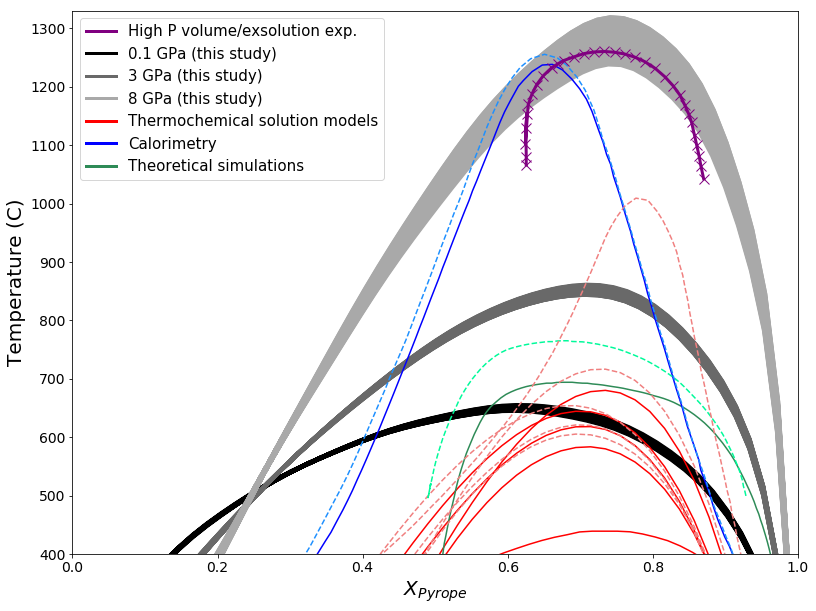

In [75]:
from matplotlib.lines import Line2D
fig = plt.subplots(figsize=(13,10))
for ixval, iyval in zip(new_x_list, new_y_list):
    plt.plot(ixval, iyval-273, 'k-', linewidth=4)

for ixval_3gpa, iyval_3gpa in zip(new_x_list_3gpa, new_y_list_3gpa):
    plt.plot(ixval_3gpa, iyval_3gpa-273, '-', linewidth=4, color='dimgrey')

for ixval_8gpa, iyval_8gpa in zip(new_x_list_8gpa, new_y_list_8gpa):
    plt.plot(ixval_8gpa, iyval_8gpa-273, '-', linewidth=5, color='darkgrey')
    
comp_matrix=np.array(comp_matrix23)

plt.plot(comp_matrix[:, 2], solvus_temps_dict_1bar['berman96_coder']-273, '-', color='red', linewidth=1.5,label='Berman and Aranovich (1996)')
plt.plot(comp_matrix[:, 2], solvus_temps_dict_1bar['berman91_coder']-273, '-', color='red',linewidth=1.5, label='Berman & Koziol (1991)')
plt.plot(comp_matrix[:, 2], solvus_temps_dict_1bar['ganguly96_coder']-273, '-', color='red',linewidth=1.5, label='Ganguly et al. (1997)')
plt.plot(comp_matrix[:, 2], solvus_temps_dict_1bar['muko97_coder']-273, '-', color='red',linewidth=1.5, label='Mukhopadhyay et al. (1996)')
plt.plot(holland_2018_1bar_data['X'], holland_2018_1bar_data['T'], '-', color='red',linewidth=1.5, label='Holland et al. (2018)')
plt.plot(vingograd_2006_1bar_data['X'], vingograd_2006_1bar_data['T'], '-', color='seagreen',linewidth=1.5, label='Vinograd & Sluiter (2006)')
plt.plot(haselton_newton_1bar_data['X']/100, haselton_newton_1bar_data['T']-273, '-', color='red',linewidth=1.5, label='Haselton & Newton (1980)')
plt.plot(dachs_geiger_1bar_data['X'], dachs_geiger_1bar_data['T'], '-', color='blue',linewidth=1.5, label='Dachs & Geiger (2006)')


plt.plot(comp_matrix[:, 2], solvus_temps_dict_3gpa['berman96_coder']-273, '--',color='lightcoral',linewidth=1.5, label='_no_label_')
plt.plot(comp_matrix[:, 2], solvus_temps_dict_3gpa['berman91_coder']-273, '--',color='lightcoral',linewidth=1.5, label='_no_label_')
plt.plot(comp_matrix[:, 2], solvus_temps_dict_3gpa['ganguly96_coder']-273, '--',color='lightcoral', linewidth=1.5,label='_no_label_')
plt.plot(comp_matrix[:, 2], solvus_temps_dict_3gpa['muko97_coder']-273, '--', color='lightcoral',linewidth=1.5,label='_no_label_')
plt.plot(holland_2018_3gpa_data['X'], holland_2018_3gpa_data['T'], '-', color='lightcoral',linewidth=1.5, label='_no_label_')
plt.plot(vingograd_2006_3gpa_data['X'], vingograd_2006_3gpa_data['T'], '--', color='mediumspringgreen',linewidth=1.5, label='_no_label_')
plt.plot(haselton_newton_4gpa_data['X']/100, haselton_newton_4gpa_data['T']-273, '--', color='lightcoral',linewidth=1.5, label='_no_label_')
plt.plot(dachs_geiger_4gpa_data['X'], dachs_geiger_4gpa_data['T'], '--',color='dodgerblue',linewidth=1.5, label='_no_label_')


plt.plot(du_8gpa_data['X'], du_8gpa_data['T'], '-x', color='purple',markersize=10, linewidth=3, label='Du (2011)')
#plt.plot(du_2gpa_data['X'], du_2gpa_data['T'], ':', color='purple',markersize=10, linewidth=4, label='Du (2011)')

plt.ylim(400, 1330)
plt.yticks(np.arange(400, 1400, 100))


#plt.legend(prop={'size': 15}, loc='upper left')
#colors = ['black', 'dimgrey', 'darkgrey', 'purple', 'red', 'blue', 'green', 'cyan', 'magenta', 'maroon', 'lime']
colors = ['purple', 'black', 'dimgrey', 'darkgrey', 'red', 'blue', 'seagreen']
lines = [Line2D([0], [0], color=c, linewidth=3, linestyle='-') for c in colors]
#labels = ['0.1 GPa (this study)', '3 GPa (this study)', '8 GPa (this study)', 'Du (2011)',
#          'Berman and Aranovich (1996)', 'Berman & Koziol (1991)', 'Ganguly et al. (1997)', 'Mukhopadhyay et al. (1996)',
#          'Vinograd & Sluiter (2006)', 'Haselton & Newton (1980)', 'Dachs & Geiger (2006)']
labels = ['High P volume/exsolution exp.', '0.1 GPa (this study)', '3 GPa (this study)', '8 GPa (this study)', 'Thermochemical solution models', 
          'Calorimetry', 'Theoretical simulations']
plt.legend(lines, labels, prop={'size': 15})
plt.xlabel('$X_{Pyrope}$', fontsize=20)
plt.ylabel('Temperature (C)', fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlim(0, 1)

plt.savefig('miscibility_gap_fig.pdf')
#fig.savefig('/Users/jennaadams/Desktop/miscibility_gap_fig.pdf', bbox_inches='tight')

In [93]:
holland_2018_1bar_data

X           T
0     0.117667  400.000000
1     0.117833  400.130556
2     0.118000  400.261111
3     0.118167  400.391667
4     0.118167  400.522222
5     0.118333  400.652778
6     0.118500  400.783333
7     0.118500  400.913889
8     0.118667  401.044444
9     0.118833  401.175000
10    0.119000  401.305556
11    0.119000  401.436111
12    0.119167  401.566667
13    0.119333  401.697222
14    0.119333  401.827778
15    0.119500  401.958333
16    0.119667  402.088889
17    0.119833  402.219444
18    0.119833  402.350000
19    0.120000  402.480556
20    0.120167  402.611111
21    0.120167  402.741667
22    0.120333  402.872222
23    0.120500  403.002778
24    0.120667  403.133333
25    0.120667  403.263889
26    0.120833  403.394444
27    0.121000  403.525000
28    0.121000  403.655556
29    0.121167  403.786111
...        ...         ...
5976  0.997333  403.786111
5977  0.997333  403.655556
5978  0.997333  403.525000
5979  0.997333  403.394444
5980  0.997333  403.263889
5981  0.997333  403.133333
5982  0.997333  403.002778
5983  0.997333  402.872222
5984  0.997333  402.741667
5985  0.997333  402.611111
5986  0.997333  402.480556
5987  0.997333  402.350000
5988  0.997333  402.219444
5989  0.997333  402.088889
5990  0.997333  401.958333
5991  0.997333  401.827778
5992  0.997333  401.697222
5993  0.997333  401.566667
5994  0.997333  401.436111
5995  0.997333  401.305556
5996  0.997333  401.175000
5997  0.997333  401.044444
5998  0.997333  400.913889
5999  0.997333  400.783333
6000  0.997333  400.652778
6001  0.997333  400.522222
6002  0.997333  400.391667
6003  0.997333  400.261111
6004  0.997500  400.130556
6005  0.997500  400.000000

[6006 rows x 2 columns]

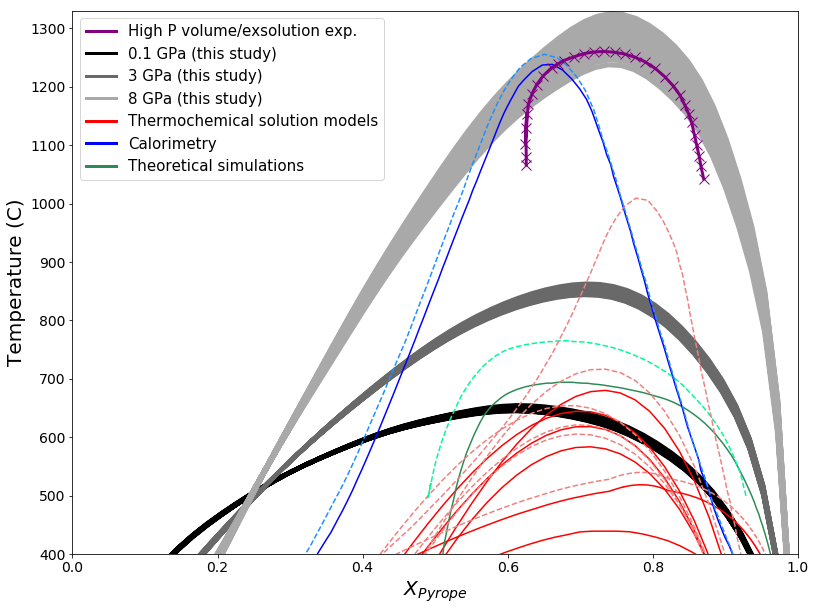

In [94]:
from matplotlib.lines import Line2D
fig = plt.subplots(figsize=(13,10))
for ixval, iyval in zip(new_x_list, new_y_list):
    plt.plot(ixval, iyval-273, 'k-', linewidth=4)

for ixval_3gpa, iyval_3gpa in zip(new_x_list_3gpa, new_y_list_3gpa):
    plt.plot(ixval_3gpa, iyval_3gpa-273, '-', linewidth=4, color='dimgrey')

for ixval_8gpa, iyval_8gpa in zip(new_x_list_8gpa, new_y_list_8gpa):
    plt.plot(ixval_8gpa, iyval_8gpa-273, '-', linewidth=5, color='darkgrey')
    
comp_matrix=np.array(comp_matrix23)

plt.plot(comp_matrix[:, 2], solvus_temps_dict_1bar['berman96_coder']-273, '-', color='red', linewidth=1.5,label='Berman and Aranovich (1996)')
plt.plot(comp_matrix[:, 2], solvus_temps_dict_1bar['berman91_coder']-273, '-', color='red',linewidth=1.5, label='Berman & Koziol (1991)')
plt.plot(comp_matrix[:, 2], solvus_temps_dict_1bar['ganguly96_coder']-273, '-', color='red',linewidth=1.5, label='Ganguly et al. (1997)')
plt.plot(comp_matrix[:, 2], solvus_temps_dict_1bar['muko97_coder']-273, '-', color='red',linewidth=1.5, label='Mukhopadhyay et al. (1996)')
plt.plot(holland_2018_1bar_data['X'], holland_2018_1bar_data['T']-273, '-', color='red',linewidth=1.5, label='Holland et al. (2018)')
plt.plot(vingograd_2006_1bar_data['X'], vingograd_2006_1bar_data['T'], '-', color='seagreen',linewidth=1.5, label='Vinograd & Sluiter (2006)')
plt.plot(haselton_newton_1bar_data['X']/100, haselton_newton_1bar_data['T']-273, '-', color='red',linewidth=1.5, label='Haselton & Newton (1980)')
plt.plot(dachs_geiger_1bar_data['X'], dachs_geiger_1bar_data['T'], '-', color='blue',linewidth=1.5, label='Dachs & Geiger (2006)')


plt.plot(comp_matrix[:, 2], solvus_temps_dict_3gpa['berman96_coder']-273, '--',color='lightcoral',linewidth=1.5, label='_no_label_')
plt.plot(comp_matrix[:, 2], solvus_temps_dict_3gpa['berman91_coder']-273, '--',color='lightcoral',linewidth=1.5, label='_no_label_')
plt.plot(comp_matrix[:, 2], solvus_temps_dict_3gpa['ganguly96_coder']-273, '--',color='lightcoral', linewidth=1.5,label='_no_label_')
plt.plot(comp_matrix[:, 2], solvus_temps_dict_3gpa['muko97_coder']-273, '--', color='lightcoral',linewidth=1.5,label='_no_label_')
plt.plot(holland_2018_3gpa_data['X'], holland_2018_3gpa_data['T']-273, '--', color='lightcoral',linewidth=1.5, label='_no_label_')
plt.plot(vingograd_2006_3gpa_data['X'], vingograd_2006_3gpa_data['T'], '--', color='mediumspringgreen',linewidth=1.5, label='_no_label_')
plt.plot(haselton_newton_4gpa_data['X']/100, haselton_newton_4gpa_data['T']-273, '--', color='lightcoral',linewidth=1.5, label='_no_label_')
plt.plot(dachs_geiger_4gpa_data['X'], dachs_geiger_4gpa_data['T'], '--',color='dodgerblue',linewidth=1.5, label='_no_label_')


plt.plot(du_8gpa_data['X'], du_8gpa_data['T'], '-x', color='purple',markersize=10, linewidth=3, label='Du (2011)')
#plt.plot(du_2gpa_data['X'], du_2gpa_data['T'], ':', color='purple',markersize=10, linewidth=4, label='Du (2011)')

plt.ylim(400, 1330)
plt.yticks(np.arange(400, 1400, 100))


#plt.legend(prop={'size': 15}, loc='upper left')
#colors = ['black', 'dimgrey', 'darkgrey', 'purple', 'red', 'blue', 'green', 'cyan', 'magenta', 'maroon', 'lime']
colors = ['purple', 'black', 'dimgrey', 'darkgrey', 'red', 'blue', 'seagreen']
lines = [Line2D([0], [0], color=c, linewidth=3, linestyle='-') for c in colors]
#labels = ['0.1 GPa (this study)', '3 GPa (this study)', '8 GPa (this study)', 'Du (2011)',
#          'Berman and Aranovich (1996)', 'Berman & Koziol (1991)', 'Ganguly et al. (1997)', 'Mukhopadhyay et al. (1996)',
#          'Vinograd & Sluiter (2006)', 'Haselton & Newton (1980)', 'Dachs & Geiger (2006)']
labels = ['High P volume/exsolution exp.', '0.1 GPa (this study)', '3 GPa (this study)', '8 GPa (this study)', 'Thermochemical solution models', 
          'Calorimetry', 'Theoretical simulations']
plt.legend(lines, labels, prop={'size': 15})
plt.xlabel('$X_{Pyrope}$', fontsize=20)
plt.ylabel('Temperature (C)', fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlim(0, 1)

plt.savefig('miscibility_gap_fig.pdf')
#fig.savefig('/Users/jennaadams/Desktop/miscibility_gap_fig.pdf', bbox_inches='tight')

In [80]:
odd_pts_8gpa=solvus_surface_list_8gpa[58][1::2]
odd_temps_8gpa=temp_list_8gpa[58][1::2]

In [81]:
even_pts_8gpa=solvus_surface_list_8gpa[58][0::2]
even_temps_8gpa=temp_list_8gpa[58][0::2]

In [91]:
even_polyfit_8gpa=np.polyfit(even_pts_8gpa, even_temps_8gpa, deg=20)
odd_polyfit_8gpa=np.polyfit(odd_pts_8gpa, odd_temps_8gpa, deg=20)
avg_polyfit_8gpa=(even_polyfit_8gpa+odd_polyfit_8gpa)/2

poly_8gpa = np.poly1d(avg_polyfit_8gpa)
new_x_8gpa = np.linspace(solvus_surface_list_8gpa[58][0], solvus_surface_list_8gpa[58][-1])
new_y_8gpa = poly_8gpa(new_x_8gpa)

/Users/jennaadams/anaconda3/envs/py36workshop/lib/python3.6/site-packages/ipykernel_launcher.py:1: RankWarning: Polyfit may be poorly conditioned
  """Entry point for launching an IPython kernel.
/Users/jennaadams/anaconda3/envs/py36workshop/lib/python3.6/site-packages/ipykernel_launcher.py:2: RankWarning: Polyfit may be poorly conditioned
  


In [93]:
odd_pts_8gpa2=solvus_surface_list_8gpa[16][1::2]
odd_temps_8gpa2=temp_list_8gpa[16][1::2]

In [94]:
even_pts_8gpa2=solvus_surface_list_8gpa[16][0::2]
even_temps_8gpa2=temp_list_8gpa[16][0::2]

In [97]:
even_polyfit_8gpa2=np.polyfit(even_pts_8gpa2, even_temps_8gpa2, deg=20)
odd_polyfit_8gpa2=np.polyfit(odd_pts_8gpa2, odd_temps_8gpa2, deg=20)
avg_polyfit_8gpa2=(even_polyfit_8gpa2+odd_polyfit_8gpa2)/2

poly_8gpa2 = np.poly1d(avg_polyfit_8gpa2)
new_x_8gpa2 = np.linspace(solvus_surface_list_8gpa[16][0], solvus_surface_list_8gpa[16][-1])
new_y_8gpa2 = poly_8gpa2(new_x_8gpa2)

/Users/jennaadams/anaconda3/envs/py36workshop/lib/python3.6/site-packages/ipykernel_launcher.py:1: RankWarning: Polyfit may be poorly conditioned
  """Entry point for launching an IPython kernel.
/Users/jennaadams/anaconda3/envs/py36workshop/lib/python3.6/site-packages/ipykernel_launcher.py:2: RankWarning: Polyfit may be poorly conditioned
  


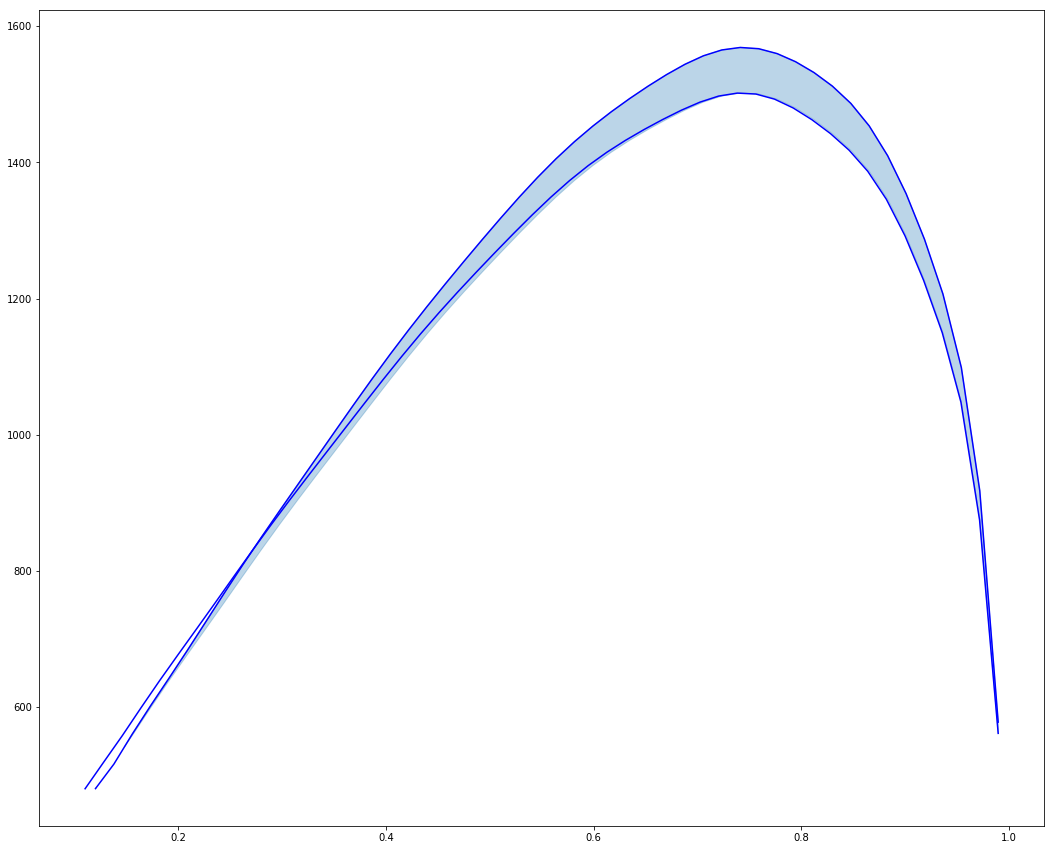

In [120]:
fig = plt.subplots(figsize=(18,15))
#plt.plot(solvus_surface_list_8gpa[58], temp_list_8gpa[58], 'r-')
#plt.plot(solvus_surface_list_8gpa[16], temp_list_8gpa[16], 'r-')
plt.plot(new_x_8gpa, new_y_8gpa, 'b-')
plt.plot(new_x_8gpa2, new_y_8gpa2, 'b-')

#plt.fill_between(new_x_8gpa, new_y_8gpa-273, new_y_8gpa2-273)
plt.fill_between(new_x_8gpa, new_y_8gpa, new_y_8gpa2, where=(new_y_8gpa > new_y_8gpa2), color='C0', alpha=0.3,
                 interpolate=True)
#plt.fill_between(new_x_8gpa2, new_y_8gpa, new_y_8gpa2)

#plt.ylim(400, 1300)

In [ ]:
T=np.array([1273])
P=np.array([30000])
min_val=np.sqrt(np.finfo(float).eps)
comp_space=np.linspace(min_val,1-min_val,50)

In [ ]:
pure_gibbs=pure_thermo_calc(T, P, model=berman96_coder, function_name='gibbs_energy')
pure_entropy=pure_thermo_calc(T, P, model=berman96_coder, function_name='entropy')
pure_enthalpy=pure_thermo_calc(T, P, model=berman96_coder, function_name='enthalpy')
pure_volume=pure_thermo_calc(T, P, model=berman96_coder, function_name='volume')

In [ ]:
binary_endmems=[1,0,3]
comp_matrix13=get_binary_comp_matrix(min_val, comp_space, binary_endmems, inverse=False)

In [ ]:
excess_gibs_berman96_13=calc_excess_gibbs(T, P, pure_gibbs, comp_matrix13, model=berman96_coder, incl_ideal_mixing=True)
excess_gibs_ganguly96_13=calc_excess_gibbs(T, P, pure_gibbs, comp_matrix13, model=ganguly96_coder, incl_ideal_mixing=True)
excess_gibs_muko97_13=calc_excess_gibbs(T, P, pure_gibbs, comp_matrix13, model=muko97_coder, incl_ideal_mixing=True)
excess_gibs_berman91_13=calc_excess_gibbs(T, P, pure_gibbs, comp_matrix13, model=berman91_coder, incl_ideal_mixing=True)

In [ ]:
excess_entr_berman96_13=calc_excess_entropy(T, P, pure_entropy, comp_matrix13, model=berman96_coder)
excess_entr_ganguly96_13=calc_excess_entropy(T, P, pure_entropy, comp_matrix13, model=ganguly96_coder)
excess_entr_muko97_13=calc_excess_entropy(T, P, pure_entropy, comp_matrix13, model=muko97_coder)
excess_entr_berman91_13=calc_excess_entropy(T, P, pure_entropy, comp_matrix13, model=berman91_coder)

In [ ]:
excess_enth_berman96_13=calc_excess_enthalpy(T, P, pure_enthalpy, comp_matrix13, model=berman96_coder)
excess_enth_ganguly96_13=calc_excess_enthalpy(T, P, pure_enthalpy, comp_matrix13, model=ganguly96_coder)
excess_enth_muko97_13=calc_excess_enthalpy(T, P, pure_enthalpy, comp_matrix13, model=muko97_coder)
excess_enth_berman91_13=calc_excess_enthalpy(T, P, pure_enthalpy, comp_matrix13, model=berman91_coder)

In [ ]:
excess_vol_berman96_13=calc_excess_volume(T, P, pure_volume, comp_matrix13, model=berman96_coder)
excess_vol_ganguly96_13=calc_excess_volume(T, P, pure_volume, comp_matrix13, model=ganguly96_coder)
excess_vol_muko97_13=calc_excess_volume(T, P, pure_volume, comp_matrix13, model=muko97_coder)
excess_vol_berman91_13=calc_excess_volume(T, P, pure_volume, comp_matrix13, model=berman91_coder)

In [ ]:
param_names=fitted_coder.param_names
params_to_change=param_names

for idraw in 
fitted_excess_gibbs_13=[]
fitted_excess_entropy_13=[]
fitted_excess_enthalpy_13=[]
fitted_excess_volume_13=[]

iparam_vals=best_fit['best_fit_sol_vals']
set_param_values(param_names, iparam_vals, params_to_change[2:-3], modelDB=modelDB_fitted)
fitted_grt=modelDB_fitted.phases['Grt']
    
igibbs=calc_excess_gibbs(T, P, pure_gibbs, comp_matrix13, model=fitted_grt, incl_ideal_mixing=True)
ientr=calc_excess_entropy(T, P, pure_entropy, comp_matrix13, model=fitted_grt)
ienth=calc_excess_enthalpy(T, P, pure_enthalpy, comp_matrix13, model=fitted_grt)
ivol=calc_excess_volume(T, P, pure_volume, comp_matrix13, model=fitted_grt)
    
fitted_excess_gibbs_13.append(igibbs)
fitted_excess_entropy_13.append(ientr)
fitted_excess_enthalpy_13.append(ienth)
fitted_excess_volume_13.append(ivol)

In [ ]:
%matplotlib inline
f, axs = plt.subplots(1,4, figsize=(26,4))
plt.subplots_adjust(wspace=0.4)

axs[0].plot(comp_space, np.array(fitted_excess_gibbs_13[0])/1000, '-', color='black', linewidth=2.5, label='All parameters')
#axs[0,0].plot(comp_space, np.array(fitted_excess_gibbs_13[1])/1000, '.-', label='All params; no tern')
#axs[0,0].plot(comp_space, np.array(fitted_excess_gibbs_13[2])/1000, '*-', label='No entropy params')
#axs[0,0].plot(comp_space, np.array(fitted_excess_gibbs_13[3])/1000, 'o-', label='No entropy; no tern')
axs[0].plot(comp_space, np.array(excess_gibs_berman96_13)/1000, 'b-.', label='Berman96')
axs[0].plot(comp_space, np.array(excess_gibs_ganguly96_13)/1000, 'g:', linewidth=4,label='Ganguly96')
axs[0].plot(comp_space, np.array(excess_gibs_muko97_13)/1000, 'm-', label='Mukhopadhyay97')
axs[0].plot(comp_space, np.array(excess_gibs_berman91_13)/1000, 'r--', label='Berman91')
axs[0].set_xlabel('X Fe', fontsize=18, fontweight = 'bold')
axs[0].set_ylabel('Excess Gibbs energy (kJ)', fontsize=18, fontweight = 'bold')
axs[0].tick_params(labelsize=18)

axs[1].plot(comp_space, np.array(fitted_excess_volume_13[0]), '-', color='black',linewidth=2.5,label='No ternary params')
#axs[0,1].plot(comp_space, np.array(fitted_excess_volume_13[1])/1000, '.-', label='All params; no tern')
#axs[0,1].plot(comp_space, np.array(fitted_excess_volume_13[2])/1000, '*-', label='No entropy params')
#axs[0,1].plot(comp_space, np.array(fitted_excess_volume_13[3])/1000, 'o-', label='No entropy; no tern')
axs[1].plot(comp_space, np.array(excess_vol_berman96_13), 'b-.', label='Berman96')
axs[1].plot(comp_space, np.array(excess_vol_ganguly96_13), 'g:', linewidth=4,label='Ganguly96')
axs[1].plot(comp_space, np.array(excess_vol_muko97_13), 'm-', label='Mukhopadhyay97')
axs[1].plot(comp_space, np.array(excess_vol_berman91_13), 'r--', label='Berman91')
axs[1].set_xlabel('X Fe', fontsize=18, fontweight = 'bold')
axs[1].set_ylabel('Excess Volume (J/bar)', fontsize=18, fontweight = 'bold')
axs[1].tick_params(labelsize=18)

axs[2].plot(comp_space, np.array(fitted_excess_enthalpy_13[0])/1000, '-', color='black',linewidth=2.5,label='No ternary params')
#axs[1,0].plot(comp_space, np.array(fitted_excess_enthalpy_13[1])/1000, '.-', label='All params; no tern')
#axs[1,0].plot(comp_space, np.array(fitted_excess_enthalpy_13[2])/1000, '*-', label='No entropy params')
#axs[1,0].plot(comp_space, np.array(fitted_excess_enthalpy_13[3])/1000, 'o-', label='No entropy; no tern')
axs[2].plot(comp_space, np.array(excess_enth_berman96_13)/1000, 'b-.', label='Berman96')
axs[2].plot(comp_space, np.array(excess_enth_ganguly96_13)/1000, 'g:', linewidth=4,label='Ganguly96')
axs[2].plot(comp_space, np.array(excess_enth_muko97_13)/1000, 'm-', label='Mukhopadhyay97')
axs[2].plot(comp_space, np.array(excess_enth_berman91_13)/1000, 'r--', label='Berman91')
axs[2].set_xlabel('X Fe', fontsize=18, fontweight = 'bold')
axs[2].set_ylabel('Excess Enthalpy (kJ)', fontsize=18, fontweight = 'bold')
axs[2].tick_params(labelsize=18)

axs[3].plot(comp_space, np.array(fitted_excess_entropy_13[0]), '-', color='black',linewidth=2.5,label='best fit: No ternary params')
#axs[1,1].plot(comp_space, np.array(fitted_excess_entropy_13[1])/1000, '.-', label='All params; no tern')
#axs[1,1].plot(comp_space, np.array(fitted_excess_entropy_13[3])/1000, 'o-', label='No entropy; no tern')
#axs[1,1].plot(comp_space, np.array(fitted_excess_entropy_13[2])/1000, '*-', label='No entropy params')
axs[3].plot(comp_space, np.array(excess_entr_berman96_13), 'b-.', label='Berman96')
axs[3].plot(comp_space, np.array(excess_entr_muko97_13), 'g:', linewidth=4,label='Mukhopadhyay97')
axs[3].plot(comp_space, np.array(excess_entr_ganguly96_13), 'm-', label='Ganguly96')
axs[3].plot(comp_space, np.array(excess_entr_berman91_13), 'r--', label='Berman91')
axs[3].set_xlabel('X Fe', fontsize=18, fontweight = 'bold')
axs[3].set_ylabel('Excess Entropy (kJ/K)', fontsize=18, fontweight = 'bold')
axs[3].tick_params(labelsize=18)

#plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

f.suptitle('Almandine-pyrope binary', y=1.1, fontsize=25)

plt.savefig('/Users/jennaadams/Desktop/alm_py_excess.pdf', bbox_inches='tight')